**Importing necessary libriaries and functions**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

**Reading the file**

In [2]:
df=pd.read_csv("../input/iris/Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


**Checking general dataframe information**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


Dropping Id feature as it is irrelevent

In [4]:
df.drop("Id",axis=1,inplace=True)

**Checking for null values**

In [5]:
df.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Visualizing data

In [6]:
sns.set(style="white")

<AxesSubplot:xlabel='Species', ylabel='count'>

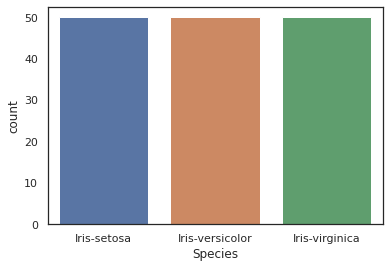

In [7]:
sns.countplot(x="Species",data=df)

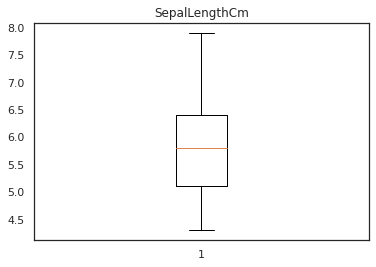

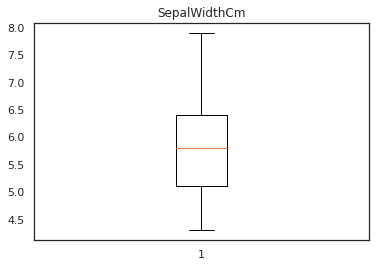

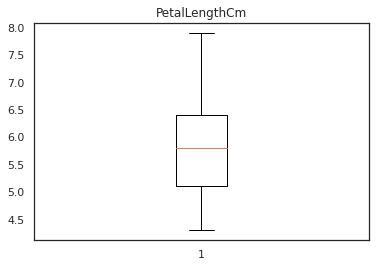

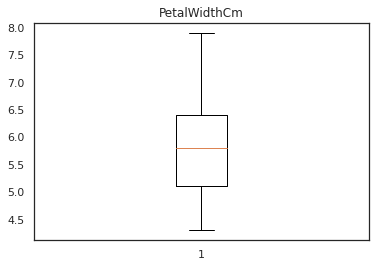

In [8]:
for i in ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']:
    plt.boxplot(x=df["SepalLengthCm"])
    plt.title(i)
    plt.show()

no outliers

**LabelEncoding the "Species" feature**

In [9]:
le=LabelEncoder()
df["Species"]=le.fit_transform(df["Species"])

**Seperating independent and dependent variables**

In [10]:
X=df.drop("Species",axis=1)
y=df["Species"]

**Standardizing the dependent variables**

In [11]:
ss=StandardScaler()
X=ss.fit_transform(X)

**Splitting Train-Test data at ratio 7:3**

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**KNN classifier with inital value of n_neighbours as 50**

In [13]:
knn=KNeighborsClassifier(n_neighbors=50)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
accuracy_score(y_test,pred)

0.8444444444444444

**84% accuracy score**

optimization of n_neighbours

In [14]:
pred_score=[]
for i in range(3,100):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    pred_score.append(accuracy_score(y_test,pred))

In [15]:
max(pred_score)

1.0

maximum value of accuracy score is 1.0

plotting the predscore against the n_neighbours

Text(0.5, 1.0, 'accuracy_score vs n_neighbours')

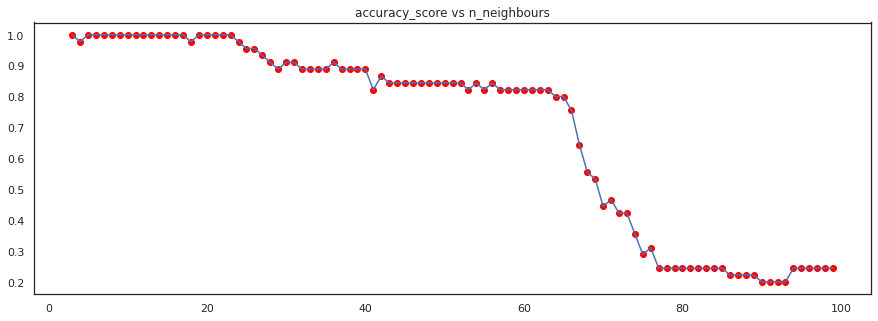

In [16]:
plt.figure(figsize=(15,5))
plt.plot(range(3,100),pred_score)
plt.scatter(range(3,100),pred_score,color='red')
plt.title('accuracy_score vs n_neighbours')

**Choosing n_neighbour as 20 since it gives 100% accuracy**

In [17]:
knn=KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
accuracy_score(y_test,pred)

1.0

**successfully created a classification model with good accuracy**